**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('talk')

In [ ]:
# Acá deberían leer el conjunto de datos que ya tienen.
url = 'https://drive.google.com/file/d/10X-tkgrUkqV2gPRq6X8hr-PR0iDz-sJp/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
melb_df = pd.read_csv(path)
melb_df[:3]

,Unnamed: 0,Rooms,Type,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount,Suburb,PrecioPromedioAirbnb
0,0,2,h,1480000.0,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,Northern Metropolitan,4019.0,Abbotsford,130.624031
1,1,2,h,1035000.0,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Northern Metropolitan,4019.0,Abbotsford,130.624031
2,2,3,h,1465000.0,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Northern Metropolitan,4019.0,Abbotsford,130.624031


In [ ]:
melb_df.drop('Unnamed: 0', axis=1, inplace=True)

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [ ]:
melb_df.columns

Index(['Rooms', 'Type', 'Price', 'Date', 'Distance', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Regionname', 'Propertycount', 'Suburb',
       'PrecioPromedioAirbnb'],
      dtype='object')

Separamos las columnas categoricas a las cuales vamos a hacer onehotencoder

In [ ]:
categorical_cols = ['Type', 'CouncilArea', 'Suburb', 'Regionname'] #columnas para pasar a onehotencoder
numerical_cols = ['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Price', 'PrecioPromedioAirbnb', 'Distance', 'Propertycount']

Aplicamos one-hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(melb_df[categorical_cols])
# We can inspect the categories found by the encoder
#encoder.categories_


OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [ ]:
encoded_types = encoder.transform(melb_df[categorical_cols])
encoded_types[:10]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
encoded_df = pd.DataFrame(data=encoded_types, columns=encoder.get_feature_names(categorical_cols))

In [ ]:
encoded_df.head(2)

,Type_h,Type_t,Type_u,CouncilArea_Abbotsford,CouncilArea_Airport West,CouncilArea_Alphington,CouncilArea_Ascot Vale,CouncilArea_Ashburton,CouncilArea_Ashwood,CouncilArea_Balaclava,CouncilArea_Banyule,CouncilArea_Bayside,CouncilArea_Bayswater,CouncilArea_Bayswater North,CouncilArea_Bellfield,CouncilArea_Bentleigh East,CouncilArea_Blackburn,CouncilArea_Blackburn North,CouncilArea_Blackburn South,CouncilArea_Boroondara,CouncilArea_Briar Hill,CouncilArea_Brighton,CouncilArea_Brighton East,CouncilArea_Brimbank,CouncilArea_Brooklyn,CouncilArea_Brunswick,CouncilArea_Brunswick East,CouncilArea_Brunswick West,CouncilArea_Bulleen,CouncilArea_Bundoora,CouncilArea_Burnside,CouncilArea_Burnside Heights,CouncilArea_Burwood,CouncilArea_Burwood East,CouncilArea_Camberwell,CouncilArea_Cardinia,CouncilArea_Carlton,CouncilArea_Carlton North,CouncilArea_Carnegie,CouncilArea_Caroline Springs,...,Suburb_Templestowe Lower,Suburb_The Basin,Suburb_Thomastown,Suburb_Thornbury,Suburb_Toorak,Suburb_Travancore,Suburb_Truganina,Suburb_Tullamarine,Suburb_Upwey,Suburb_Vermont,Suburb_Vermont South,Suburb_Viewbank,Suburb_Wantirna,Suburb_Wantirna South,Suburb_Warrandyte,Suburb_Waterways,Suburb_Watsonia,Suburb_Watsonia North,Suburb_Werribee,Suburb_West Footscray,Suburb_West Melbourne,Suburb_Westmeadows,Suburb_Wheelers Hill,Suburb_Whittlesea,Suburb_Williams Landing,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Wonga Park,Suburb_Wyndham Vale,Suburb_Yallambie,Suburb_Yarra Glen,Suburb_Yarraville,Regionname_Eastern Metropolitan,Regionname_Northern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Victoria,Regionname_Western Metropolitan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
encoded_df.shape

(13441, 472)

In [ ]:
#melb_df_enc = pd.concat([encoded_df, melb_df[numerical_cols]], axis=1)

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

## Escalamos las variables numericas para que esten en un mismo rango

Consideramos necesario escalar las variables ya que KNN requiere escalado de datos porque usa la distancia euclidiana entre dos puntos de datos para encontrar vecinos más cercanos. La distancia euclidiana es sensible a las magnitudes. Las características con magnitudes altas pesarán más que las características con magnitudes bajas. KNN tampoco es adecuado para datos de grandes dimensiones. Para obtener mejores resultados, se recomienda encarecidamente normalizar los datos en la misma escala. Generalmente, el rango de normalización considerado entre 0 y 1. KNN no es adecuado para datos de grandes dimensiones. En tales casos, la dimensión debe reducirse para mejorar el rendimiento. Además, manejar los valores perdidos nos ayudará a mejorar los resultados. 

*Fuente: https://acortar.link/h7ybe*

In [ ]:
numerical_cols =['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'PrecioPromedioAirbnb', 'Distance', 'Propertycount']

In [ ]:
df_melb_numeric= melb_df[numerical_cols]
df_melb_numerical = pd.concat([df_melb_numeric, melb_df[['YearBuilt', 'BuildingArea']]], axis=1)

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(df_melb_numerical[['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'PrecioPromedioAirbnb', 'Distance', 'Propertycount','YearBuilt','BuildingArea']])
df_melb_numerical_scaled = scaler.transform(df_melb_numerical[['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'PrecioPromedioAirbnb', 'Distance', 'Propertycount','YearBuilt','BuildingArea']])

In [ ]:
df_melb_numerical_scaled = pd.DataFrame(df_melb_numerical_scaled, columns=['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'PrecioPromedioAirbnb', 'Distance', 'Propertycount','YearBuilt','BuildingArea'])

In [ ]:
df_melb_numerical_scaled.head()

,Rooms,Bedroom2,Bathroom,Car,PrecioPromedioAirbnb,Distance,Propertycount,YearBuilt,BuildingArea
0,-0.987651,-0.975218,-0.790416,-0.645986,-0.009309,-1.322411,-0.785303,NaN,NaN
1,-0.987651,-0.975218,-0.790416,-1.726191,-0.009309,-1.322411,-0.785303,-1.797693,-0.515686
2,0.072400,0.097881,0.694210,-1.726191,-0.009309,-1.322411,-0.785303,-1.797693,0.035098
3,0.072400,0.097881,0.694210,-0.645986,-0.009309,-1.322411,-0.785303,NaN,NaN
4,1.132450,0.097881,-0.790416,0.434220,-0.009309,-1.322411,-0.785303,1.355655,-0.026962


In [ ]:
df_melb_numerical_scaled.isna().sum()

Rooms                      0
Bedroom2                   0
Bathroom                   0
Car                        0
PrecioPromedioAirbnb       0
Distance                   0
Propertycount              0
YearBuilt               5307
BuildingArea            6378
dtype: int64

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = df_melb_numerical_scaled.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [ ]:
melb_data_mice

,Rooms,Bedroom2,Bathroom,Car,PrecioPromedioAirbnb,Distance,Propertycount,YearBuilt,BuildingArea
0,-0.987651,-0.975218,-0.790416,-0.645986,-0.009309,-1.322411,-0.785303,0.885419,0.216624
1,-0.987651,-0.975218,-0.790416,-1.726191,-0.009309,-1.322411,-0.785303,-1.797693,-0.515686
2,0.072400,0.097881,0.694210,-1.726191,-0.009309,-1.322411,-0.785303,-1.797693,0.035098
3,0.072400,0.097881,0.694210,-0.645986,-0.009309,-1.322411,-0.785303,0.885419,0.216624
4,1.132450,0.097881,-0.790416,0.434220,-0.009309,-1.322411,-0.785303,1.355655,-0.026962
...,...,...,...,...,...,...,...,...,...
13436,1.132450,1.170980,0.694210,0.434220,-0.111827,1.142129,-0.015194,0.442844,0.134394
13437,0.072400,0.097881,0.694210,0.434220,0.930322,-0.576106,-0.246250,0.830097,-0.096780
13438,0.072400,0.097881,0.694210,2.594631,0.930322,-0.576106,-0.246250,0.885419,0.216624
13439,1.132450,1.170980,-0.790416,3.674836,0.930322,-0.576106,-0.246250,-1.244474,0.089401


In [ ]:
## Variable YearBuilt original sin NaN
melb_year_build_orig = melb_df.YearBuilt.dropna().to_frame()
melb_year_build_orig['No Imputation'] = 'Original'

In [ ]:
## Variable BuildingArea original sin NaN
melb_build_area_orig = melb_df.BuildingArea.dropna().to_frame()
melb_build_area_orig['No Imputation'] = 'Original'

In [ ]:
## Variable BuildingArea luego de escalar e imputar
mice_build_area_esc = melb_data_mice.BuildingArea.to_frame()
mice_build_area_esc['Imputation'] = 'KNN over BuildingArea'

In [ ]:
## Variable YearBuilt luego de escalar e imputar
mice_year_built_esc = melb_data_mice.YearBuilt.to_frame()
mice_year_built_esc['Imputation'] = 'KNN over YearBuilt'

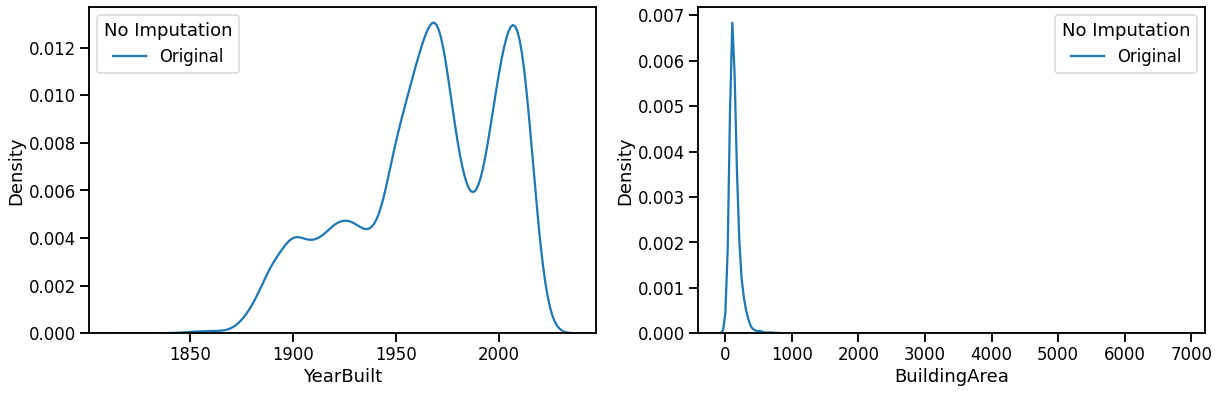

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
#plt.xlim(-1, 1)
sns.kdeplot(data=melb_year_build_orig, x='YearBuilt', hue='No Imputation', ax=ax[0], )
sns.kdeplot(data=melb_build_area_orig, x='BuildingArea', hue='No Imputation', ax=ax[1])

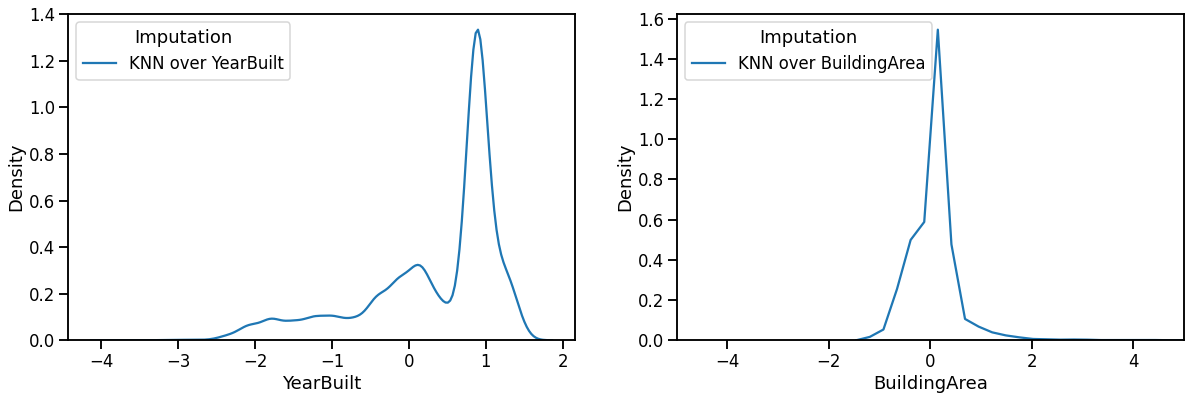

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
plt.xlim(-5, 5)
sns.kdeplot(data=mice_year_built_esc, x='YearBuilt', hue='Imputation', ax=ax[0])
sns.kdeplot(data=mice_build_area_esc, x='BuildingArea', hue='Imputation', ax=ax[1])

In [ ]:
melb_data_mice.isna().sum()

Rooms                   0
Bedroom2                0
Bathroom                0
Car                     0
PrecioPromedioAirbnb    0
Distance                0
Propertycount           0
YearBuilt               0
BuildingArea            0
dtype: int64

In [ ]:
melb_df_final = pd.concat([encoded_df,melb_data_mice], axis=1)

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit_transform(melb_df_final)

In [ ]:
pca.shape

(13441, 481)

In [ ]:
ex_variance=np.var(pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)

https://etav.github.io/python/scikit_pca.html

Antes de aplicar PCA es necesario estandarizar siempre ya que el analisis de componentes principales es un método de reduccion de variables que identifica aquellas direcciones en las que la varianza es mayor. Como la varianza de una variable se mide en su misma escala elevada al cuadrado, si antes de calcular las componentes no se estandarizan todas las variables para que tengan media 0 y desviación estándar 1, aquellas variables cuya escala sea mayor dominarán al resto. De ahí que sea recomendable estandarizar siempre los datos. 

#### Paso a paso

In [ ]:
covar_matrix = PCA(n_components = 481)

In [ ]:
covar_matrix.fit(melb_df_final)
variance = covar_matrix.explained_variance_ratio_ 

In [ ]:
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

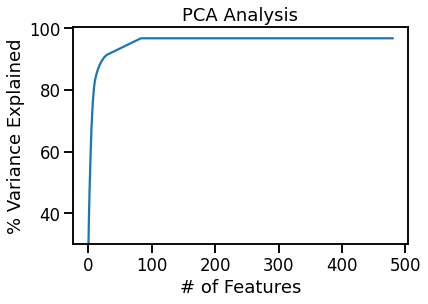

In [ ]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

Elegimos las primeras 88 columnas, ya que contienen el 97% de la varianza total, luego alcanza el plateau.

In [ ]:
processed_melb_df = pd.DataFrame(data=pca[:,:87])
processed_melb_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86
0,-1.821557,-0.444794,-0.685471,0.490321,-0.565186,0.267297,0.845927,-0.443765,0.707117,-0.559314,-0.606248,-0.001820,-0.110282,-0.088054,0.311657,-0.006170,0.529354,0.449718,0.061464,-0.020577,-0.018113,-0.245175,-0.065491,0.109852,0.028493,0.003698,0.009033,-0.013122,-0.012992,-0.078789,-0.046889,-0.079875,0.016385,0.007456,0.037522,-0.096864,0.024623,0.061762,-0.003236,-0.077995,...,0.030399,-0.018889,0.014332,0.017434,-0.035035,-0.042253,-0.076321,0.013822,0.000899,-0.024239,0.014811,-0.005650,0.017172,0.040803,0.028580,-0.042655,-0.004464,0.005151,0.003280,-0.007525,-0.004415,-0.005908,0.009493,0.004292,0.005303,0.006336,0.002871,-0.002694,-0.003434,-0.001745,-0.012142,0.031185,-0.166599,0.035932,-0.174104,0.095717,-0.039459,0.009610,0.021972,0.001422
1,-2.367708,-0.170635,-2.349807,-1.027666,0.692563,-0.330422,-0.202039,0.045194,0.872314,-0.487898,-0.268634,-0.031850,0.007391,-0.037367,0.340731,-0.005894,0.513153,0.420405,0.022955,0.025493,0.021166,-0.232884,-0.073189,0.089073,0.016194,-0.001879,0.004405,0.011738,-0.001697,-0.093749,-0.052979,-0.062777,0.001123,-0.005289,0.033737,-0.107093,0.029299,0.068475,0.000383,-0.055401,...,0.029718,-0.019990,0.007939,0.013723,-0.046991,-0.042463,-0.058624,0.019942,0.008936,-0.013734,0.002594,-0.005346,0.004509,0.035715,0.029952,-0.041142,-0.002356,0.011297,0.014991,-0.000059,-0.009221,-0.007458,0.008983,-0.000557,-0.002572,0.019789,-0.001969,-0.003720,-0.008081,0.007292,-0.022465,0.033121,-0.158644,0.037699,-0.177623,0.090517,-0.036183,0.004916,0.026813,0.003310
2,-0.540339,0.333028,-2.876554,-0.845228,0.026232,-0.817699,-0.375888,0.319769,0.986357,-0.482600,-0.031682,-0.089086,-0.101005,-0.075786,0.333632,-0.053555,0.497043,0.394309,0.018919,0.040317,0.005835,-0.255254,-0.052494,0.068648,0.010445,0.010053,0.013986,0.011134,0.000690,-0.095652,-0.052284,-0.058487,0.001224,-0.007694,0.031911,-0.112678,0.030119,0.069399,0.009846,-0.054739,...,0.027915,-0.019978,0.011017,0.012615,-0.044613,-0.043295,-0.057153,0.017395,0.006289,-0.010666,0.001681,-0.002561,0.004695,0.037969,0.024985,-0.044963,-0.002429,0.004487,0.012996,-0.001187,-0.010549,-0.006403,0.012051,0.002757,0.000129,0.018713,-0.000809,0.001587,-0.011989,0.006455,-0.023591,0.033443,-0.158451,0.039309,-0.180916,0.087495,-0.035056,0.002370,0.023752,0.003177
3,-0.081844,0.029136,-1.198634,0.615810,-1.155626,-0.182378,0.272119,-0.516228,0.790814,-0.555517,-0.419058,-0.046011,-0.224869,-0.123175,0.305492,-0.047259,0.514028,0.423466,0.053038,-0.005788,-0.030579,-0.267640,-0.047306,0.092616,0.023511,0.015760,0.014481,-0.014915,-0.009026,-0.080203,-0.046407,-0.077322,0.016086,0.005661,0.036390,-0.102679,0.026786,0.064069,0.005781,-0.077550,...,0.028516,-0.017821,0.017536,0.017278,-0.033485,-0.042915,-0.075142,0.010295,-0.001316,-0.022166,0.013025,-0.003325,0.017338,0.042712,0.024653,-0.046281,-0.004629,-0.001337,0.002257,-0.008389,-0.006867,-0.003732,0.012942,0.007998,0.008570,0.006186,0.003898,0.002213,-0.006684,-0.002174,-0.012397,0.031043,-0.166080,0.037115,-0.175514,0.091250,-0.035370,0.006888,0.021822,0.001609
4,0.219040,-0.241701,-0.592575,0.350476,-0.674304,0.755907,1.098144,-1.606551,0.089675,-0.672967,-0.160040,-0.047620,-0.162459,-0.143207,0.341875,-0.034336,0.531674,0.485352,0.081958,-0.076242,-0.045255,-0.121497,0.027853,0.264938,0.754534,0.036549,-0.046706,-0.036739,-0.028472,-0.063664,-0.041732,-0.104343,0.036622,0.019665,0.043713,-0.093638,0.020031,0.059508,0.011794,-0.084221,...,0.033053,-0.021173,0.028705,0.013707,-0.037429,-0.036700,-0.083109,0.010221,0.003761,-0.026134,0.018739,-0.012242,0.020411,0.037365,0.022606,-0.045518,-0.009883,0.004112,0.000745,-0.015943,-0.004617,-0.005360,0.014369,0.001168,0.007844,0.002986,0.002520,-0.003909,0.003186,-0.007228,-0.000496,0.024465,-0.168768,0.0

In [ ]:
processed_melb_df.to_csv("melb_pca.csv")

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
import numpy
import pandas
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

Matrix has shape (13441, 9), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Northern Metropolitan', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Victoria', 'Regionname=Western Metropolitan']
Matrix has shape (13441, 9), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Northern Metropolitan', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Victoria', 'Regionname=Western Metropolitan', 'Rooms', 'Distance']


,Type=h,Type=t,Type=u,Regionname=Eastern Metropolitan,Regionname=Northern Metropolitan,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Victoria,Regionname=Western Metropolitan,Rooms,Distance,pca1,pca2
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.650841,-0.266237
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.650841,-0.266237
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.600617,0.640855
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.600617,0.640855
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.5,-7.550392,1.547948


In [ ]:
melb_df_final.to_csv("melb_df_final")

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
